# PROJETO 4


## GRUPO:
### Felipe Giorgi Vaz Guimarães
### Felipe Viacava
___

In [85]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Giorgi\Desktop\3° Semestre\DP - Ciência dos Dados\CD1S17\Projeto 4


#### Descrição do tema:

No presente trabalho será descrita a análise da diferença de renda entre os estados de SP e RJ. 

A base de dados de onde foram retiradas as rendas dos indivíduos destes estados foi a PNAD 2014. Dentre as pessoas inclusas nessa base de dados, apenas aquelas que trabalham, vivem em zonas urbanas e têm entre 20 e 70 anos foram levadas em consideração.

In [86]:
dados2014 = pd.read_csv('PES2014.csv',sep=',')

In [87]:
dados2014.V4720 = dados2014.V4720[(dados2014.V4720 != 999999999999) & (~dados2014.V4720.isnull())]

In [88]:
dados2014 = dados2014.dropna(subset = ['V4720'])

In [89]:
dadosRio = dados2014[(dados2014.UF == 33) & (dados2014.V9001 == 1) & (dados2014.V8005 > 20) & (dados2014.V8005 < 70) & (dados2014.V4728 < 4)]

In [90]:
dadosSP = dados2014[(dados2014.UF == 35) & (dados2014.V9001 == 1) & (dados2014.V8005 > 20) & (dados2014.V8005 < 70) & (dados2014.V4728 < 4)]

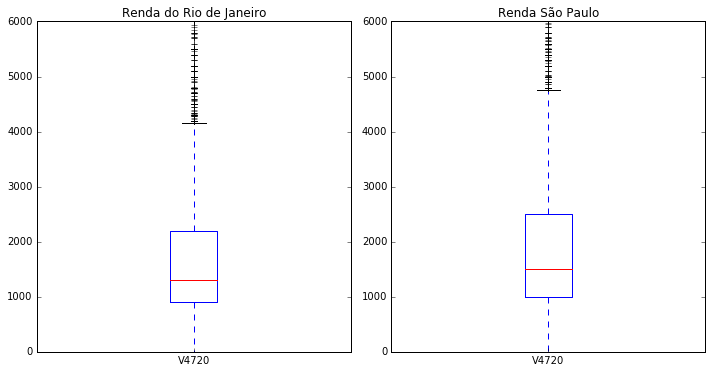

In [91]:
plt.figure(figsize = (10,10))

plt.subplot(221)
dadosRio.V4720.plot(kind = 'box', title = "Renda do Rio de Janeiro")
plt.ylim(0,6000)

plt.subplot(222)
dadosSP.V4720.plot(kind = 'box', title = 'Renda São Paulo')
plt.ylim(0,6000)

plt.tight_layout()
plt.show()

Os boxplots acima representam a renda da população selecionada nos estados estudados.

Para comparar as duas regiões adequadamente, foram retirados da análise todos os indivíduos com renda superior a R$4500,00. Este valor foi selecionado com base na observação dos boxplots e representa de forma grosseira o valor médio entre os máximos dos boxplots para SP e RJ.

In [92]:
dadosRio = dadosRio[dadosRio.V4720 < 4500]
dadosSP = dadosSP[dadosSP.V4720 < 4500]

In [93]:
ddRio = dadosRio[:9000]

In [94]:
ddSP = dadosSP[:9000]

In [95]:
dd = pd.DataFrame()

In [96]:
dd['RendaSP'] = sorted(ddSP.V4720)
dd['RendaRio'] = sorted(ddRio.V4720)

Além da filtragem dos outliers foram também sorteados 9000 indivíduos de cada estado para a criação de um dataframe contendo apenas a renda de cada um deles.

In [97]:
faixa = np.arange(0,5000,500)

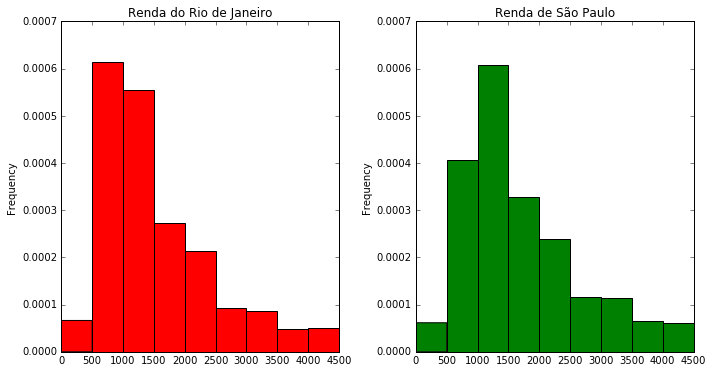

In [98]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
dd.RendaRio.plot.hist(bins=faixa, title='Renda do Rio de Janeiro', color="red", alpha=1, normed = 1)


plt.subplot(222)
dd.RendaSP.plot.hist(bins=faixa, title='Renda de São Paulo', color="green", alpha=1, normed = 1)

plt.tight_layout()
plt.show()

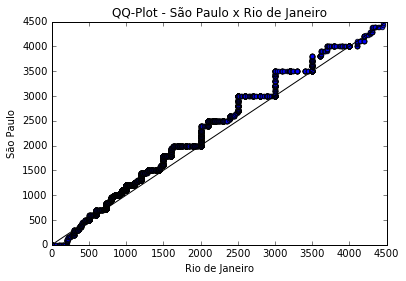

In [99]:
plt.scatter(dd.RendaRio, dd.RendaSP, c='blue', alpha=0.8)
plt.plot((0,100000),(0,100000), c='black')
plt.title('QQ-Plot - São Paulo x Rio de Janeiro')
plt.axis([0,4500,0,4500])
plt.xlabel('Rio de Janeiro')
plt.ylabel('São Paulo')
plt.show()

A seguir foi realizada a aderência de um modelo de distribuição probabilística normal aos dados de cada estado. Um modelo anormal também foi aderido. A ideia foi apenas verificar qual deles representaria melhor a realidade para selecionar o teste inferencial mais adequado.

In [100]:
medRio = dd.RendaRio.mean()
medSP = dd.RendaSP.mean()

sigmaRio = (dd.RendaRio.var())**0.5
sigmaSP = (dd.RendaSP.var())**0.5

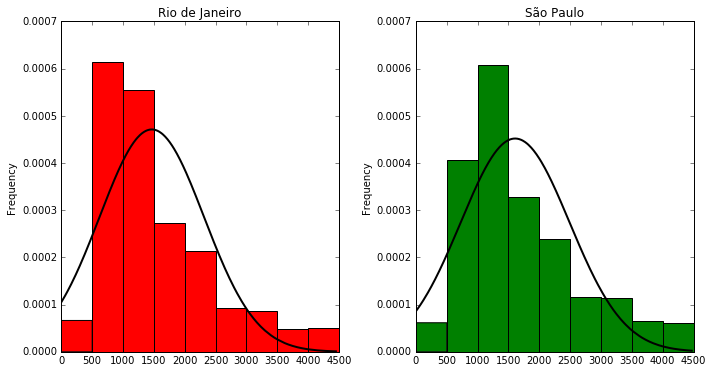

In [101]:
plt.figure(figsize = (10, 10))

plt.subplot(221)
dd.RendaRio.plot.hist(bins = faixa, title = 'Rio de Janeiro', alpha = 1, color = 'red', normed = 1)
plt.plot(dd.RendaRio, stats.norm.pdf(dd.RendaRio, loc = medRio, scale = sigmaRio), lw = 2, alpha = 1, color = 'black')

plt.subplot(222)
dd.RendaSP.plot.hist(bins = faixa, title = 'São Paulo', alpha = 1, color = 'green', normed = 1)
plt.plot(dd.RendaSP, stats.norm.pdf(dd.RendaSP, loc = medSP, scale = sigmaSP), lw = 2, alpha = 1, color = 'black')

plt.tight_layout()
plt.show()

In [102]:
fae = []
for i in range(1,9001):
    fae.append((i-0.5)/9000)

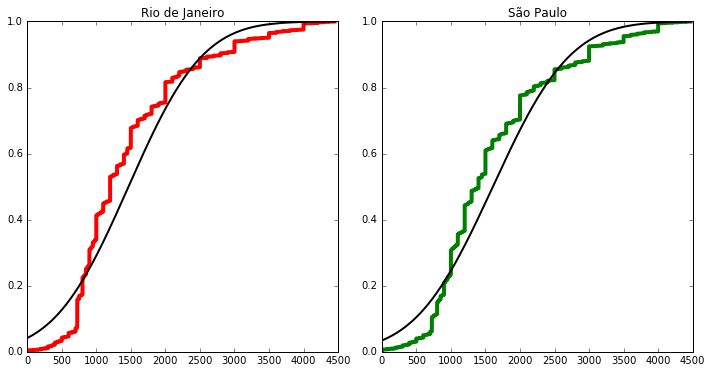

In [103]:
plt.figure(figsize=(10,10)) 

plt.subplot(221)
plt.title("Rio de Janeiro")
plt.plot(dd.RendaRio, fae, lw=4, color="red")
plt.plot(dd.RendaRio, stats.norm.cdf(dd.RendaRio, medRio, sigmaRio), lw=2, color="black")

plt.subplot(222)
plt.title("São Paulo")
plt.plot(dd.RendaSP, fae, lw=4, color="green")
plt.plot(dd.RendaSP, stats.norm.cdf(dd.RendaSP, medSP, sigmaSP), lw=2, color="black")

plt.tight_layout()
plt.show()

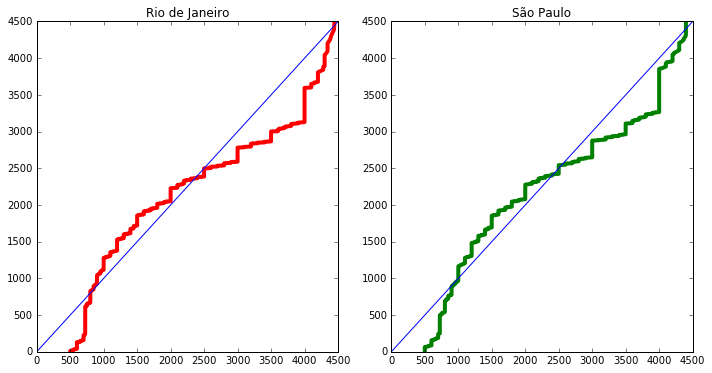

In [104]:
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.plot(dd.RendaRio, stats.norm.ppf(fae, loc = medRio, scale = sigmaRio), lw=4, color="red")
plt.plot((0,4500),(0,4500))
plt.title('Rio de Janeiro')
plt.axis([0,4500,0,4500])

plt.subplot(222)
plt.plot(dd.RendaSP, stats.norm.ppf(fae, loc = medSP, scale = sigmaSP), lw=4, color="green")
plt.plot((0,4500),(0,4500))
plt.title('São Paulo')
plt.axis([0,4500,0,4500])


plt.tight_layout()
plt.show()

In [105]:
aRio, lRio, bRio = stats.gamma.fit(dd.RendaRio)
aSP, lSP, bSP = stats.gamma.fit(dd.RendaSP)

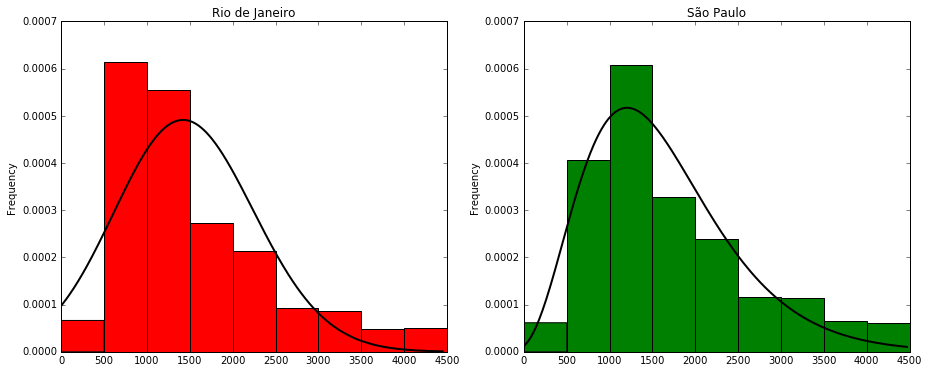

In [106]:
plt.figure(figsize = (10,10))

plt.subplot(221)
dd.RendaRio.plot.hist(bins = faixa, title = 'Rio de Janeiro', alpha = 1, color = 'red', normed = 1)
plt.plot(dd.RendaRio, stats.gamma.pdf(dd.RendaRio, aRio, loc = lRio, scale = bRio), lw = 2, alpha = 1, color = 'black')

plt.subplot(222)
dd.RendaSP.plot.hist(bins = faixa, title = 'São Paulo', figsize = (13, 10), alpha = 1, color = 'green', normed = 1)
plt.plot(dd.RendaSP, stats.gamma.pdf(dd.RendaSP, aSP, loc = lSP, scale = bSP), lw = 2, alpha = 1, color = 'black')

plt.tight_layout()
plt.show()

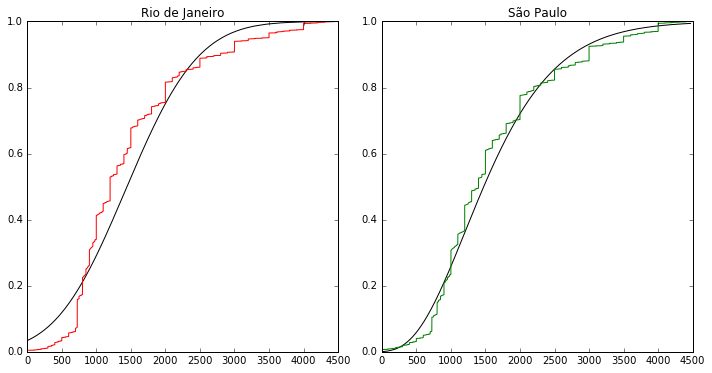

In [107]:
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.plot(dd.RendaRio, stats.gamma.cdf(dd.RendaRio, aRio, loc = lRio, scale = bRio), color = 'black')
plt.plot(dd.RendaRio, fae, color = 'red')
plt.title('Rio de Janeiro')

plt.subplot(222)
plt.plot(dd.RendaSP, stats.gamma.cdf(dd.RendaSP, aSP, loc = lSP, scale = bSP), color = 'black')
plt.plot(dd.RendaSP, fae, color = 'green')
plt.title('São Paulo')

plt.tight_layout()
plt.show()

Graficamente é possível dizer que o modelo probabilístico de distribuição anormal se adequa melhor aos dados do que o modelo normal. Desta forma, o teste de permutação foi escolhido com teste inferencial da análise.

## Criação das hipóteses nula e alternativa

Para poder avaliar se a renda de São Paulo é mesmo maior que a do Rio de Janeiro, forma criadas as hipóteses nula e alternativas:

Ho : $μ$RJ = $μ$SP   / Renda de São Paulo é igual a do Rio de Janeiro

Ha : $μ$RJ < $μ$SP   / Renda de São Paulo é maior que a do Rio de Janeiro

In [108]:
print("A média da renda no Rio de Janeiro é", int(dd.RendaRio.mean()))
print("A média da renda em São Paulo é", int(dd.RendaSP.mean()))
print("A diferença das médias é", int(dd.RendaSP.mean() - dd.RendaRio.mean()))

A média da renda no Rio de Janeiro é 1466
A média da renda em São Paulo é 1607
A diferença das médias é 141


In [109]:
nRio = len(dd.RendaRio)
nSP = len(dd.RendaSP)
ListaTotal = list(pd.concat([dd.RendaRio,dd.RendaSP]))

In [110]:
def shuffle(x):
    x = list(x)
    random.shuffle(x)
    return x

In [111]:
dif_perm = []
for i in range(0,20000):
    a = shuffle(ListaTotal)
    dif_perm.append(np.mean(a[0:8999]) - np.mean(a[9000:]))

In [112]:
x = pd.DataFrame()
x['DifMedias'] = sorted(dif_perm)

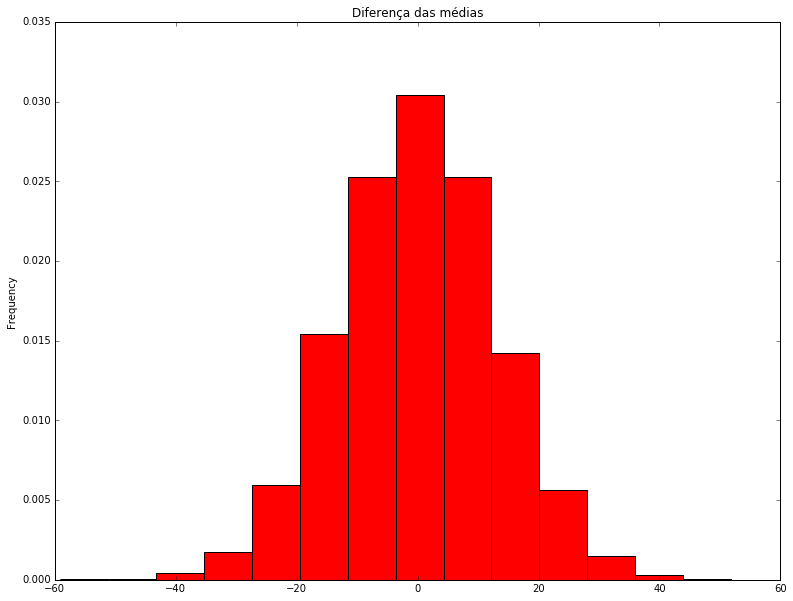

In [113]:
x.DifMedias.plot.hist(bins = 15, title = 'Diferença das médias', figsize = (13, 10), alpha = 1, color = 'red', normed = 1)

Unindo a população dos estados de SP e RJ e tirando, aleatoriamente, duas populações para calcular a diferença entre suas médias salariais 20000 vezes e montando o histograma destas diferenças, já se pode observar que a diferença de R$141,00 só se observa quando as populações são separadas por estado. Assim, entende-se que o estado é o fator determinante na diferença de renda, confirmando a hipótese alternativa (Ha).